In [1]:
import pandas as pd
import math as m
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  
import glob

##6.1

In [8]:
df_list = []
file_list = glob.glob("data/*.csv")
for filename in file_list:
  df_list.append(pd.read_csv(filename))

In [12]:
print(file_list[5][5:-4])

ASHOKA


In [14]:
df = pd.DataFrame()
for (filename, df_temp) in zip(file_list, df_list):
  df[filename[5:-4]] = df_temp[df_temp['Series'] == 'EQ']['Close Price']

##6.2

In [15]:
dr=df[:249].pct_change().fillna(0).mean()*252 # annual percentage returns
dsr=df[:249].pct_change().fillna(0).std()*m.sqrt(252) # volatility

##6.3

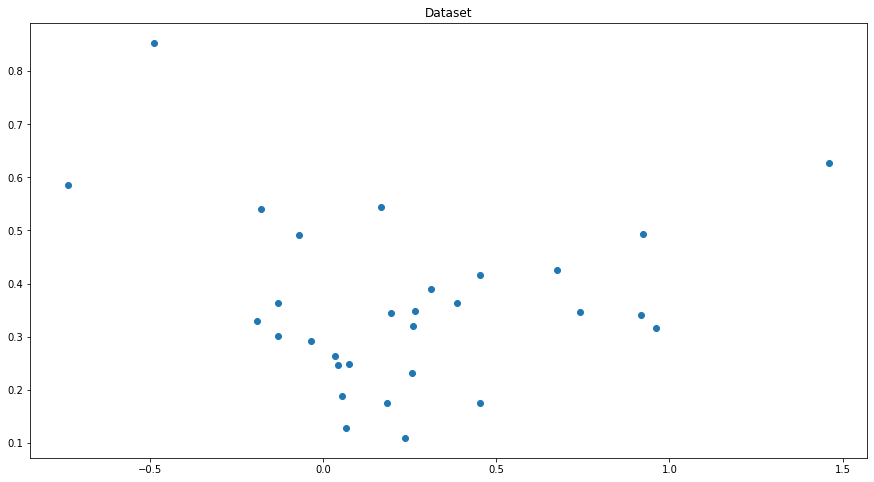

In [16]:
x1 = dr 
x2 = dsr 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
  
#Visualizing the data 
plt.figure(figsize=(15,8))
plt.plot() 

plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 

In [17]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1 : 0.3746403107281771
2 : 0.2568951721766005
3 : 0.19935416951117194
4 : 0.156336860745874
5 : 0.13388714361051104
6 : 0.11005477417642855
7 : 0.09868643976662674
8 : 0.09148171699788048
9 : 0.07630032828756872


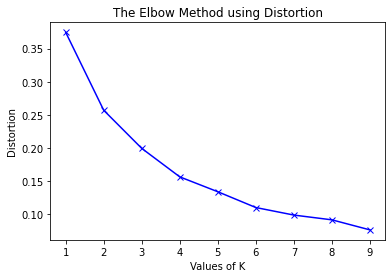

In [18]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 6.728135809907333
2 : 2.9375188529610794
3 : 1.5896937050234663
4 : 1.0367146509628382
5 : 0.6714848621274827
6 : 0.4670703546896428
7 : 0.37655328230216983
8 : 0.33081376800625156
9 : 0.24878359710174996


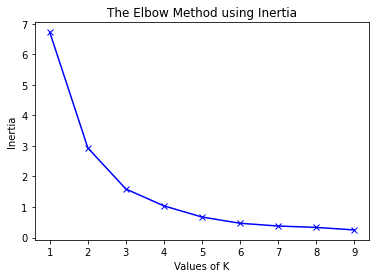

In [19]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [22]:
# From elbow nethod we can say that the best value of k is 4

kmeanModel = KMeans(n_clusters=4).fit(X) 
kmeanModel.fit(X)
print(kmeanModel.cluster_centers_)

[[ 0.9472982   0.42525869]
 [-0.04143667  0.30812795]
 [-0.61189393  0.71983776]
 [ 0.28883413  0.31069543]]


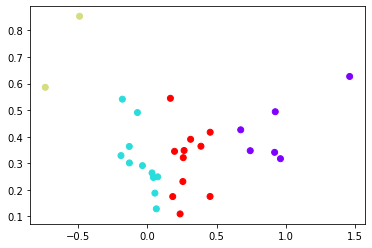

In [23]:
plt.scatter(X[:,0],X[:,1], c=kmeanModel.labels_, cmap='rainbow')

##6.4

In [24]:
dfn = pd.DataFrame()
dfn['name'] = dr.index
dfn['cluster'] = kmeanModel.predict(X)
print(dfn)

          name  cluster
0       FORTIS        1
1         MRPL        1
2         GAIL        1
3      RAYMOND        3
4    BAJAJELEC        0
5       ASHOKA        3
6     HINDALCO        3
7     MINDTREE        0
8     EXIDEIND        1
9    GODREJIND        1
10  HINDUNILVR        3
11      LUXIND        0
12  HEROMOTOCO        1
13    JUBLFOOD        0
14         IGL        2
15  CENTURYPLY        3
16         PVR        1
17        HDFC        1
18    GMRINFRA        3
19        INFY        3
20         NCC        3
21    INFRATEL        1
22   GUJALKALI        3
23         ITC        1
24  JINDALSTEL        0
25   BOMDYEING        0
26  MUTHOOTFIN        3
27    HDFCBANK        3
28        IDBI        1
29         IOC        2
